#                                   Vehicle Performance Prediction

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# Set default setting of seaborn
sns.set()

In [ ]:
df_veh_perf = pd.read_csv("D:\Data Analytics\Project\Project 2\SGD_Regressor\data.csv")

In [ ]:
df_veh_perf.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [ ]:
df_veh_perf.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower              object
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

In [ ]:
df_veh_perf.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [ ]:
df_veh_perf.shape

(398, 9)

In [ ]:
df_veh_perf['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
df_veh_perf['horsepower'].size

398

In [ ]:
df_data1 = df_veh_perf[df_veh_perf['horsepower'] != '?']

In [ ]:
df_data1.shape

(392, 9)

In [ ]:
df_data1['horsepower'] = df_data1['horsepower'].astype('float')

<ipython-input-11-6a92e0cbd2c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data1['horsepower'] = df_data1['horsepower'].astype('float')


In [ ]:
df_data1.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower             float64
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

On to preparing the categorical features :

* model_year is ordinal. So we simply stick to dtype int.
* origin is a true categorical. We need to one hot encode it later.
* name actually contains two useful bits of information: the cars manufacturer and the model. We split that into two new columns.

In [ ]:
df_data1['origin'] = df_data1['origin'].astype('object')

<ipython-input-13-daae7f09507d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data1['origin'] = df_data1['origin'].astype('object')


Splicting of Name field to to variables as "manufacturer" and "mode". split() function is used.

In [ ]:
# setting the maxsplit parameter(n) to 1, will return a list with 2 elements!

df_data1[["manufacturer", "model"]] = df_data1["name"].str.split(" ", n=1, expand=True) 
df_data1.drop("name", axis=1, inplace=True)
df_data1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,manufacturer,model
0,1,8,307.0,130.0,3504,12.0,1970,7.652587,chevrolet,chevelle malibu
1,1,8,350.0,165.0,3693,11.5,1970,6.377156,buick,skylark 320
2,1,8,318.0,150.0,3436,11.0,1970,7.652587,plymouth,satellite
3,1,8,304.0,150.0,3433,12.0,1970,6.802299,amc,rebel sst
4,1,8,302.0,140.0,3449,10.5,1970,7.227443,ford,torino
...,...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6,1982,11.478880,ford,mustang gl
394,2,4,97.0,52.0,2130,24.6,1982,18.706323,vw,pickup
395,1,4,135.0,84.0,2295,11.6,1982,13.604599,dodge,rampage
396,1,4,120.0,79.0,2625,18.6,1982,11.904024,ford,ranger


In [ ]:
un = df_data1.manufacturer.unique()
un

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='manufacturer'>

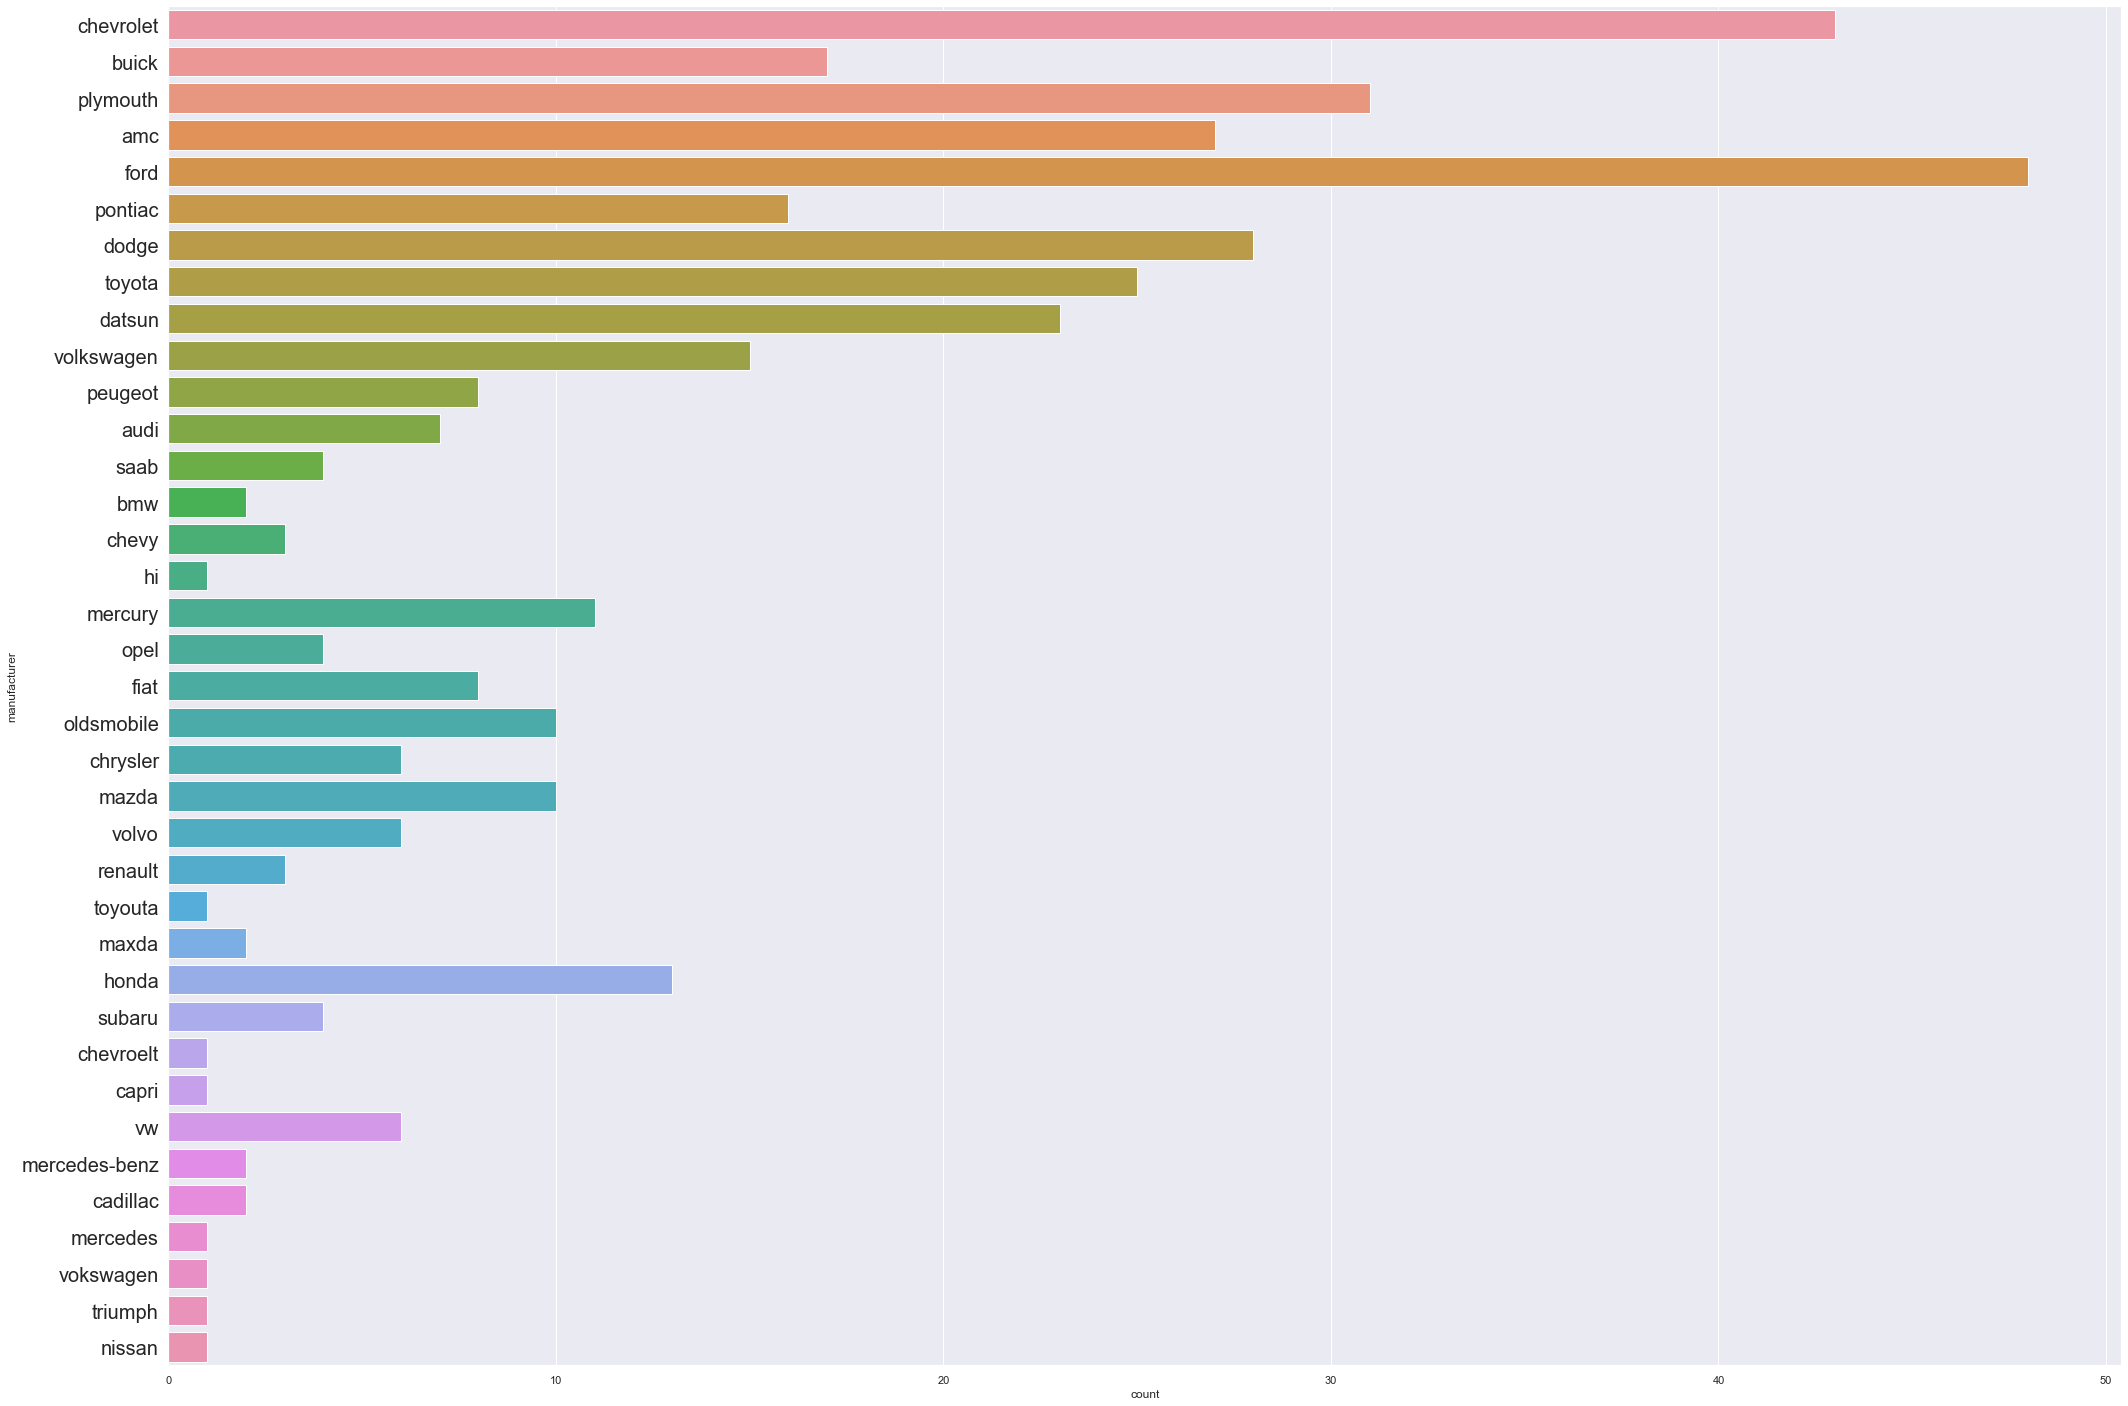

In [ ]:
# Count plot is used to find the count of unique values

plt.figure(figsize = (35,25))
# plt.xticks(fountsize = 15, rotation='vertical') # If plotting is doing on X axis
plt.yticks(fontsize = 20)
sns.countplot(y=  df_data1.manufacturer)

There are several errors in the manufacturers names. E.g. «vokswagen», «maxda» etc. We fix these by replacing the wrong entries. We also fix some synomyms like «vw».

Below is a common practice to replace the wrong entries in a dataframe.

In [ ]:
errors = {
         "vokswagen" : "volkswagen", 
         "vw" : "volkswagen", 
         "toyouta" : "toyota", 
         "mercedes-benz" : "mercedes", 
         "chevroelt": "chevrolet",
         "chevy" : "chevrolet", 
         "maxda" : "mazda"
         }


In [ ]:
df_data1['manufacturer'] = df_data1['manufacturer'].map(errors).fillna(df_data1['manufacturer'])

<ipython-input-18-0cbd38fbcd88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data1['manufacturer'] = df_data1['manufacturer'].map(errors).fillna(df_data1['manufacturer'])


In [ ]:
df_data1['manufacturer']

# plt.figure(figsize = (35,25))
# plt.xticks(fountsize = 15, rotation='vertical') # If plotting is doing on X axis
# plt.yticks(fontsize = 20)
# sns.countplot(y=  df_data1.manufacturer)

0       chevrolet
1           buick
2        plymouth
3             amc
4            ford
          ...    
393          ford
394    volkswagen
395         dodge
396          ford
397     chevrolet
Name: manufacturer, Length: 392, dtype: object

In [ ]:
print(sorted(df_data1.manufacturer.unique()))

['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevrolet', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'mazda', 'mercedes', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'triumph', 'volkswagen', 'volvo']


In [ ]:
df_data1.model

0      chevelle malibu
1          skylark 320
2            satellite
3            rebel sst
4               torino
            ...       
393         mustang gl
394             pickup
395            rampage
396             ranger
397               s-10
Name: model, Length: 392, dtype: object

## Some model names also seem redundant or wrong.

Hand checking would be way too time-consuming so we only improve this features brute-force by removing all special characters.

In [ ]:
import re # Regular Expression (RegEx)  library. Used to delete special characters for a given data.

def alphanumeric(x): # insted of writting for loop we can use a function
    return re.sub('[^A-Za-z0-9]+', '', (str(x)))

df_data1["model"] = df_data1.model.apply(lambda x: alphanumeric(x)) # apply() is faster than 'for' loop since it is doing parallel processing

<ipython-input-22-c30b6bc9ab76>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data1["model"] = df_data1.model.apply(lambda x: alphanumeric(x)) # apply() is faster than 'for' loop since it is doing parallel processing


In [ ]:
df_data1["model"]

0      chevellemalibu
1          skylark320
2           satellite
3            rebelsst
4              torino
            ...      
393         mustanggl
394            pickup
395           rampage
396            ranger
397               s10
Name: model, Length: 392, dtype: object

In [ ]:
df_data1

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,manufacturer,model
0,1,8,307.0,130.0,3504,12.0,1970,7.652587,chevrolet,chevellemalibu
1,1,8,350.0,165.0,3693,11.5,1970,6.377156,buick,skylark320
2,1,8,318.0,150.0,3436,11.0,1970,7.652587,plymouth,satellite
3,1,8,304.0,150.0,3433,12.0,1970,6.802299,amc,rebelsst
4,1,8,302.0,140.0,3449,10.5,1970,7.227443,ford,torino
...,...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6,1982,11.478880,ford,mustanggl
394,2,4,97.0,52.0,2130,24.6,1982,18.706323,volkswagen,pickup
395,1,4,135.0,84.0,2295,11.6,1982,13.604599,dodge,rampage
396,1,4,120.0,79.0,2625,18.6,1982,11.904024,ford,ranger


# Statistical Summary

In [ ]:
df_data1.describe()

,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,1975.979592,9.967885
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,3.318250
min,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000,3.826293
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,1973.000000,7.227443
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,1976.000000,9.672019
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,1979.000000,12.329168
max,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000,19.811697


In [ ]:
df_data1.describe(include = 'object')

,origin,manufacturer,model
count,392,392,392
unique,3,30,293
top,1,ford,pinto
freq,245,48,5


# EDA

array([[<AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'displacement'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'acceleration'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'Kilometer_per_liter'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

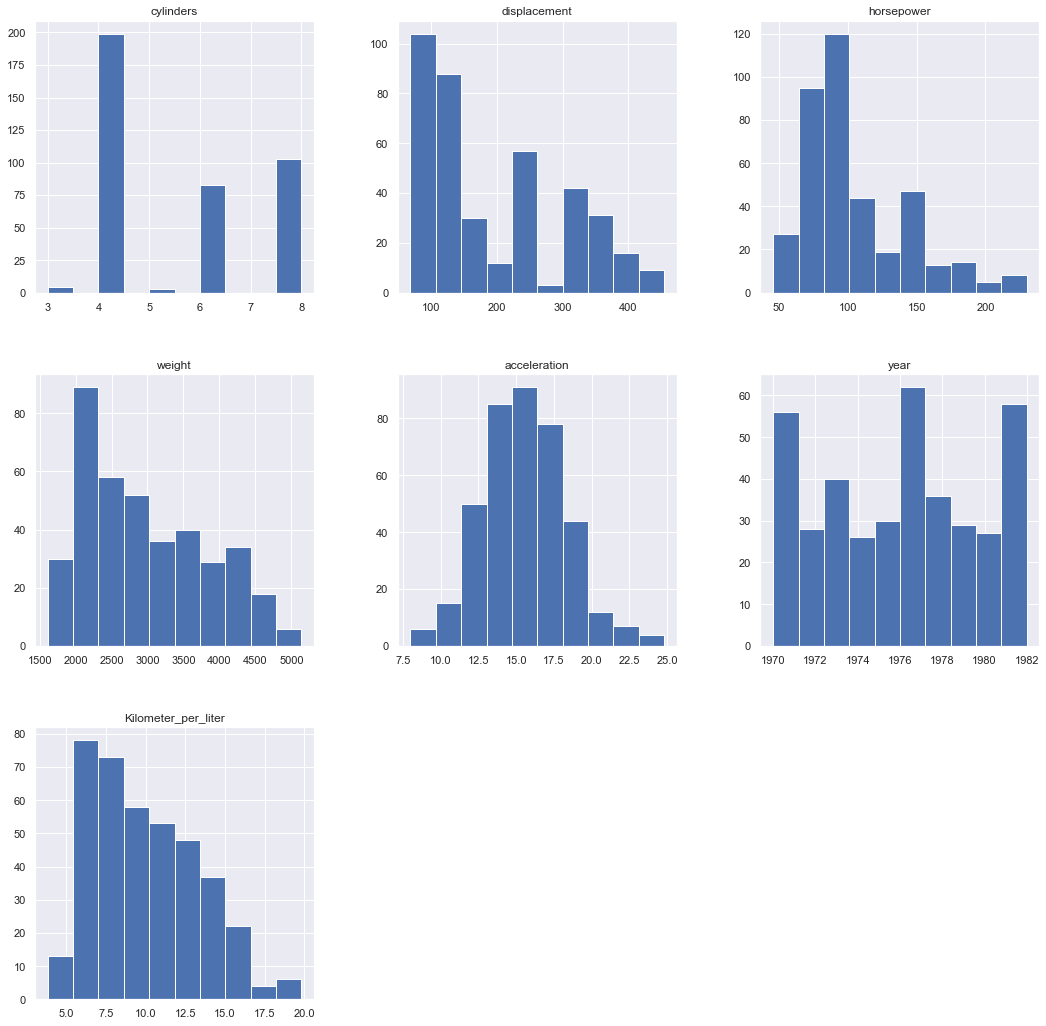

In [ ]:
df_data1.hist(figsize = (18,18))

Analysis

In [ ]:
df_data1.Kilometer_per_liter.describe()

count    392.000000
mean       9.967885
std        3.318250
min        3.826293
25%        7.227443
50%        9.672019
75%       12.329168
max       19.811697
Name: Kilometer_per_liter, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='Density'>

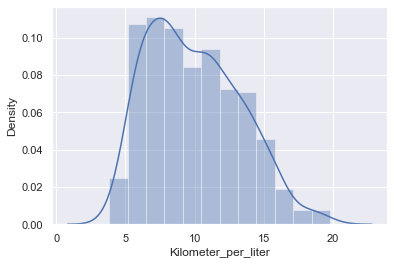

In [ ]:
sns.distplot(df_data1.Kilometer_per_liter)

In [ ]:
p = shapiro(df_data1.Kilometer_per_liter)
p

ShapiroResult(statistic=0.967170000076294, pvalue=1.0495841706870124e-07)

In [ ]:
print('statistic=%.3f , pvalue=%.3f' %p) #shapiro test result

statistic=0.967 , pvalue=0.000


Since the pValue is 0 we reject the null hypothesis (H0)

In [ ]:
df_data1.Kilometer_per_liter.skew()

0.45709232306040987

**If the skewness is between -0.5 and 0.5, the data are fairly symmetrical**

**If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed**

**If the skewness is less than -1 or greater than 1, the data are highly skewed**

**Q-Q Plot (quantile-quantile plot)**

When the quantiles of two variables are plotted against each other, then the plot obtained is known as quantile – quantile plot or qqplot. This plot provides a summary of whether the distributions of two variables are similar or not with respect to the locations.

All point of quantiles lie on or close to straight line at an angle of 45 degree from x – axis. It indicates that two samples have similar distributions.

Probability plot (probplot) Same as a Q-Q plot, however probabilities are shown in the scale of the theoretical distribution (x-axis) and the y-axis contains unscaled quantiles of the sample data.

In [ ]:
#plt.figure(figsize = (25,35))
#sm.qqplot(df_data1["Kilometer_per_liter"],line = '45')

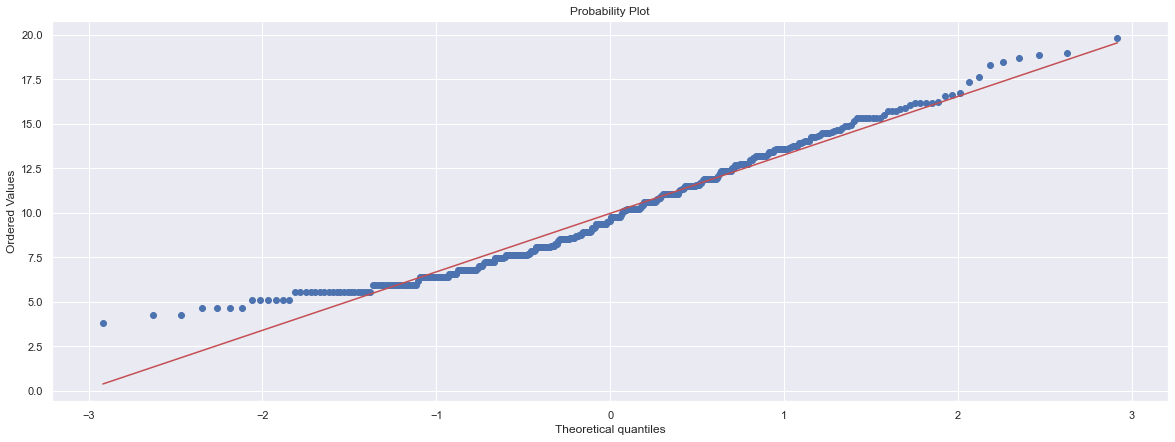

In [ ]:
plt.figure(figsize = (20,7))
stats.probplot(df_data1["Kilometer_per_liter"],plot =plt)
plt.show()

We can see that Kilometer_per_liter is not normally distributed

To normalize the data we are doing log transformation.

**Log-Transformation**

In [ ]:
df_data2 = df_data1.copy(deep = True)

In [ ]:
df_data2['log_mileage'] = np.log(df_data2['Kilometer_per_liter'])

In [ ]:
df_data2['log_mileage'].head

<bound method NDFrame.head of 0      2.035044
1      1.852722
2      2.035044
3      1.917261
4      1.977885
         ...   
393    2.440509
394    2.928862
395    2.610408
396    2.476876
397    2.578659
Name: log_mileage, Length: 392, dtype: float64>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_mileage', ylabel='Density'>

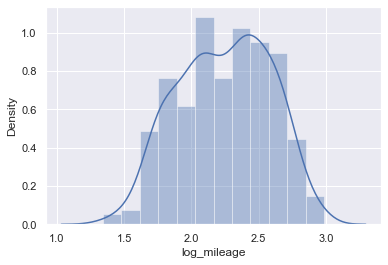

In [ ]:
sns.distplot(df_data2['log_mileage'])

We are getting near to a gaussian distribution here after the log transformation.

In [ ]:
p = shapiro(df_data2['log_mileage'])
p

ShapiroResult(statistic=0.9816548824310303, pvalue=7.037756586214527e-05)

In [ ]:
print('statistic=%3.f , pvalue=%3f ' % p)

statistic=  1 , pvalue=0.000070 


In [ ]:
df_data2.log_mileage.skew()

-0.13138171834899506

In [ ]:
# Probplot

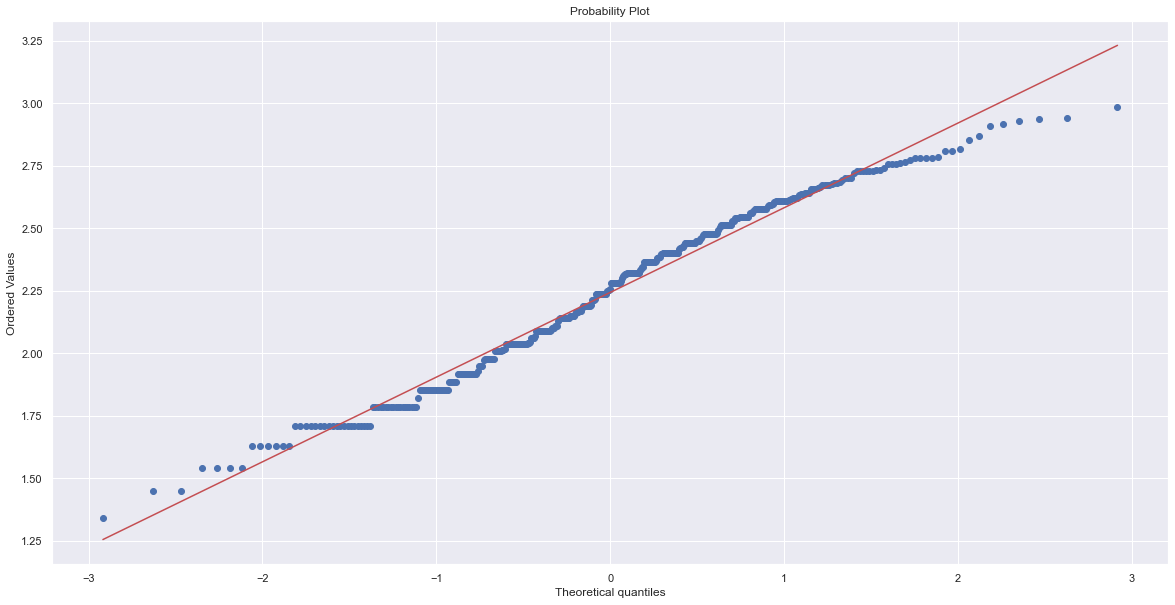

In [ ]:
plt.figure(figsize = (20,10))
stats.probplot(df_data2['log_mileage'], plot =plt)
plt.show()

The the data is normaly distributed now.

In [ ]:
df_data2.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'Kilometer_per_liter', 'manufacturer', 'model',
       'log_mileage'],
      dtype='object')

 2. Distribution of Displacement

In [ ]:
df_data2.displacement.describe()

count    392.000000
mean     194.411990
std      104.644004
min       68.000000
25%      105.000000
50%      151.000000
75%      275.750000
max      455.000000
Name: displacement, dtype: float64

    So the minimum value is 68 and maximum is 455, but on average it is 194.41 with a variation of 104.64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='displacement', ylabel='Density'>

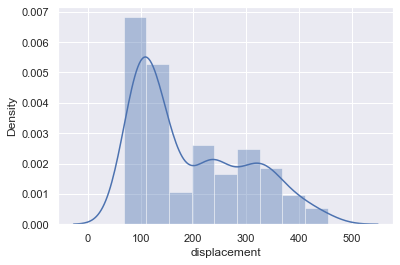

In [ ]:
sns.distplot(df_data2.displacement)

**3. Analysis of Cylinder**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


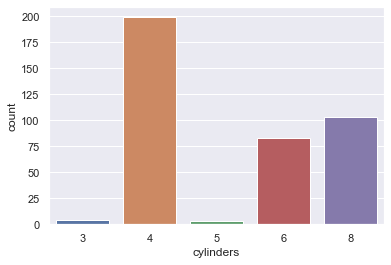

In [ ]:
sns.countplot(df_data2.cylinders)
plt.show()

From above Countplot

From the above above plot we can visualize that there are maximum number of 4 cylinder vehicles.

Around 98% of the vehicles are either of 4, 6, 8 cylinders and only small percent of vehicles are either of 3 and 5 cylinders.

Cylinders is categorical, but in our dataset it is numerical.So changing type

In [ ]:
df_data3 = df_data2.copy(deep = True)

In [ ]:
df_data3['cylinders'] = df_data3['cylinders'].astype('object')

In [ ]:
df_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    object 
 1   cylinders            392 non-null    object 
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   Kilometer_per_liter  392 non-null    float64
 8   manufacturer         392 non-null    object 
 9   model                392 non-null    object 
 10  log_mileage          392 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 44.9+ KB


Cylinder data type is changed to onject.

4. Analysis of model year

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


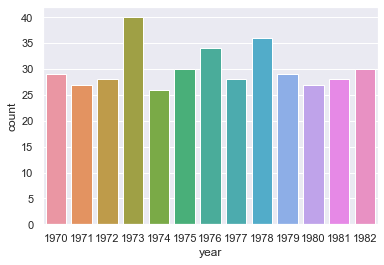

In [ ]:
sns.countplot(df_data3.year)
plt.show()

Maximum number of vehicles are of the year 1973 and minumum number of the year 1974.

5. Analysis of Origin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='origin', ylabel='count'>

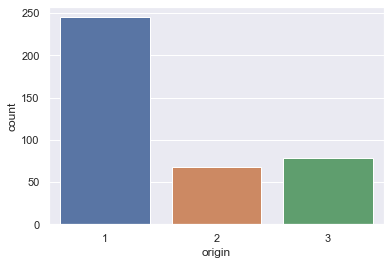

In [ ]:
sns.countplot(df_data3.origin)

6. Analysis of Horsepower

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


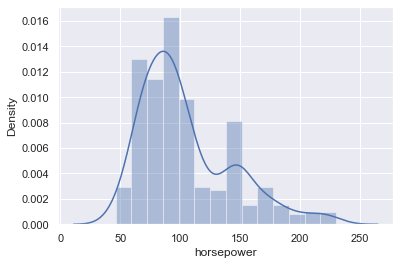

In [ ]:
sns.distplot(df_data3.horsepower)
plt.show()

From above distribution

Horsepower rates the engine performance of cars

We can visualize that most of the vehicles have around 75-110 horsepower

And only few vehicles have horsepoer above 200.

7. Analysis of Manufacturer

In [ ]:
df_data3.manufacturer

0       chevrolet
1           buick
2        plymouth
3             amc
4            ford
          ...    
393          ford
394    volkswagen
395         dodge
396          ford
397     chevrolet
Name: manufacturer, Length: 392, dtype: object

<AxesSubplot:xlabel='manufacturer', ylabel='count'>

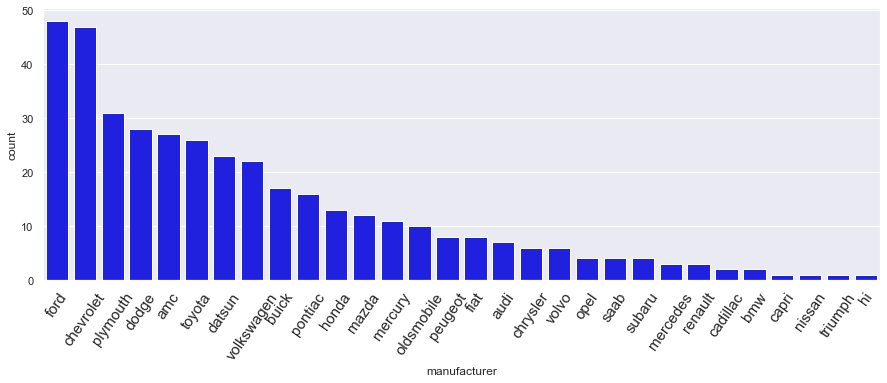

In [ ]:
plt.figure(figsize = (15,5))
# plt.xticks(fountsize = 15, rotation='vertical') # If plotting is doing on X axis
plt.xticks(fontsize = 15, rotation = 55)

# Sorting using the countplot in decending order
sns.countplot(x=  df_data3.manufacturer, order=df_data3['manufacturer'].value_counts().sort_values(ascending = False).index, color = 'blue')

# Sorting using the countplot in ascending order
# We can do the sorting as below, by eliminating the sort_values()

# sns.countplot(x=  df_data3.manufacturer, order=df_data3['manufacturer'].value_counts(ascending = True).index )

 8. Analysis of Car Model

In [ ]:
temp1 = pd.Series(df_data3['model']).value_counts( ascending = True ).values 
# by default the va;ue_counts() sorts the value is decending order
temp1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 5, 5, 5, 5], dtype=int64)

In [ ]:
# fnding top  models

counts,values = pd.Series(df_data3['model']).value_counts().values, pd.Series(df_data3['model']).value_counts().index
df_results = pd.DataFrame(list(zip(values,counts)),columns=["value","count"])

In [ ]:
df_results[:10] # Filtered top 10 datas

,value,count
0,pinto,5
1,matador,5
2,rabbit,5
3,corolla,5
4,chevette,4
5,corona,4
6,hornet,4
7,impala,4
8,504,4
9,gremlin,4


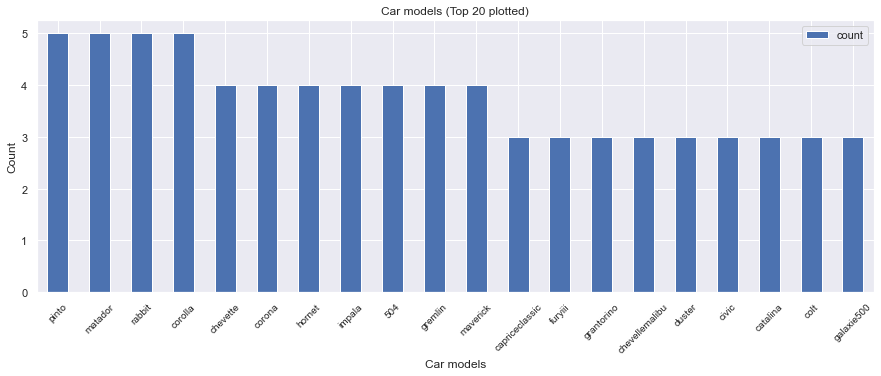

In [ ]:
df_results[:20].plot.bar(x = 'value', figsize = (15,5),) # bar ploting top 20 models
plt.title("Car models (Top 20 plotted)")
plt.ylabel("Count")
plt.xlabel("Car models")
plt.xticks(rotation=45 , fontsize = 10)
plt.show()

## 4.2 Multivariate Analysis

Analysing the dependent varibale with each independent variables

We can use joint plot for visual analysis of 2 variables

sns.jointplot() # seaborn library

For reading joint plot https://seaborn.pydata.org/generated/seaborn.jointplot.html

**1. Analysis of kilometer_per_liter with weight**

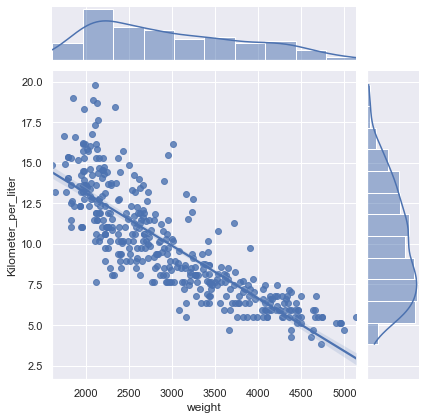

In [ ]:
sns.jointplot(x = df_data3['weight'], y = df_data3['Kilometer_per_liter'], kind = 'reg')

#Set kind="reg" to add a linear regression fit (using regplot()) and univariate KDE curves:

**2. Analysis of kilometer_per_liter with horsepower**

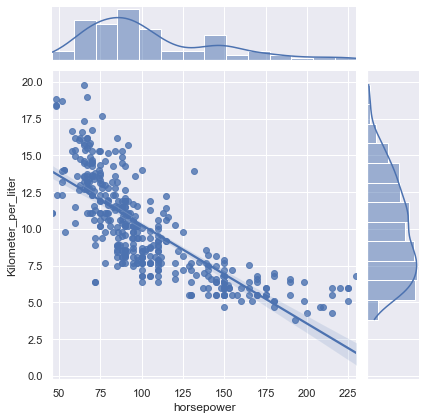

In [ ]:
sns.jointplot(y = df_data3['Kilometer_per_liter'], x = df_data3['horsepower'], kind = 'reg' )

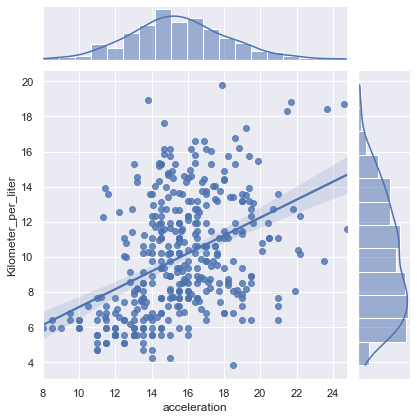

In [ ]:
sns.jointplot(x = df_data3['acceleration'], y = df_data3['Kilometer_per_liter'], kind = 'reg')

**5. Analysis of kilometer_per_liter with cylinders**

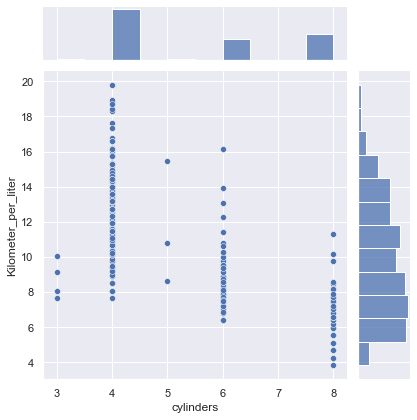

In [ ]:
sns.jointplot(x = df_data3['cylinders'], y = df_data3['Kilometer_per_liter'])

# Since we can't infer anything from jointplot, we use the box plot

<AxesSubplot:xlabel='cylinders', ylabel='Kilometer_per_liter'>

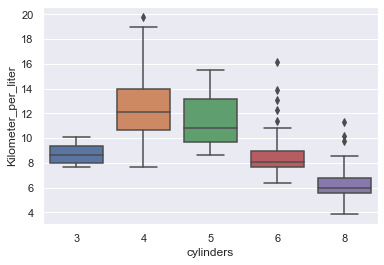

In [ ]:
#Boxplot
sns.boxplot(x = df_data3['cylinders'], y = df_data3['Kilometer_per_liter'], )

We can easily visualize that the mileage per gallon (mpg) of 4 cylinder vehicles is maximum and we also saw that most of the vehicles are 4 cylinder.

**6. Analysis of kilometer_per_liter with year**

<AxesSubplot:xlabel='year', ylabel='Kilometer_per_liter'>

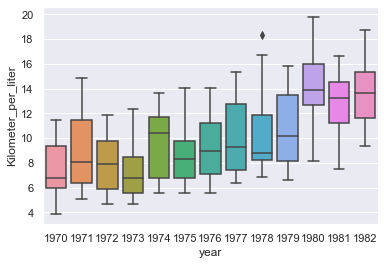

In [ ]:
sns.boxplot(x = df_data3['year'], y = df_data3['Kilometer_per_liter'])

When the year is increasing, the millage also increases

## 4.3 Covariance

In [ ]:
#NumPy Library 

df_data3.cov()

,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,log_mileage
displacement,10950.367554,3614.033744,82929.100139,-156.994435,-142.572133,-279.568213,-30.376921
horsepower,3614.033744,1481.569393,28265.620231,-73.186967,-59.036432,-99.423226,-10.865480
weight,82929.100139,28265.620231,721484.709008,-976.815253,-967.228457,-2345.705196,-252.916327
acceleration,-156.994435,-73.186967,-976.815253,7.611331,2.950462,3.875404,0.419879
year,-142.572133,-59.036432,-967.228457,2.950462,13.569915,7.096276,0.723103
Kilometer_per_liter,-279.568213,-99.423226,-2345.705196,3.875404,7.096276,11.010782,1.110178
log_mileage,-30.376921,-10.865480,-252.916327,0.419879,0.723103,1.110178,0.115626


<AxesSubplot:>

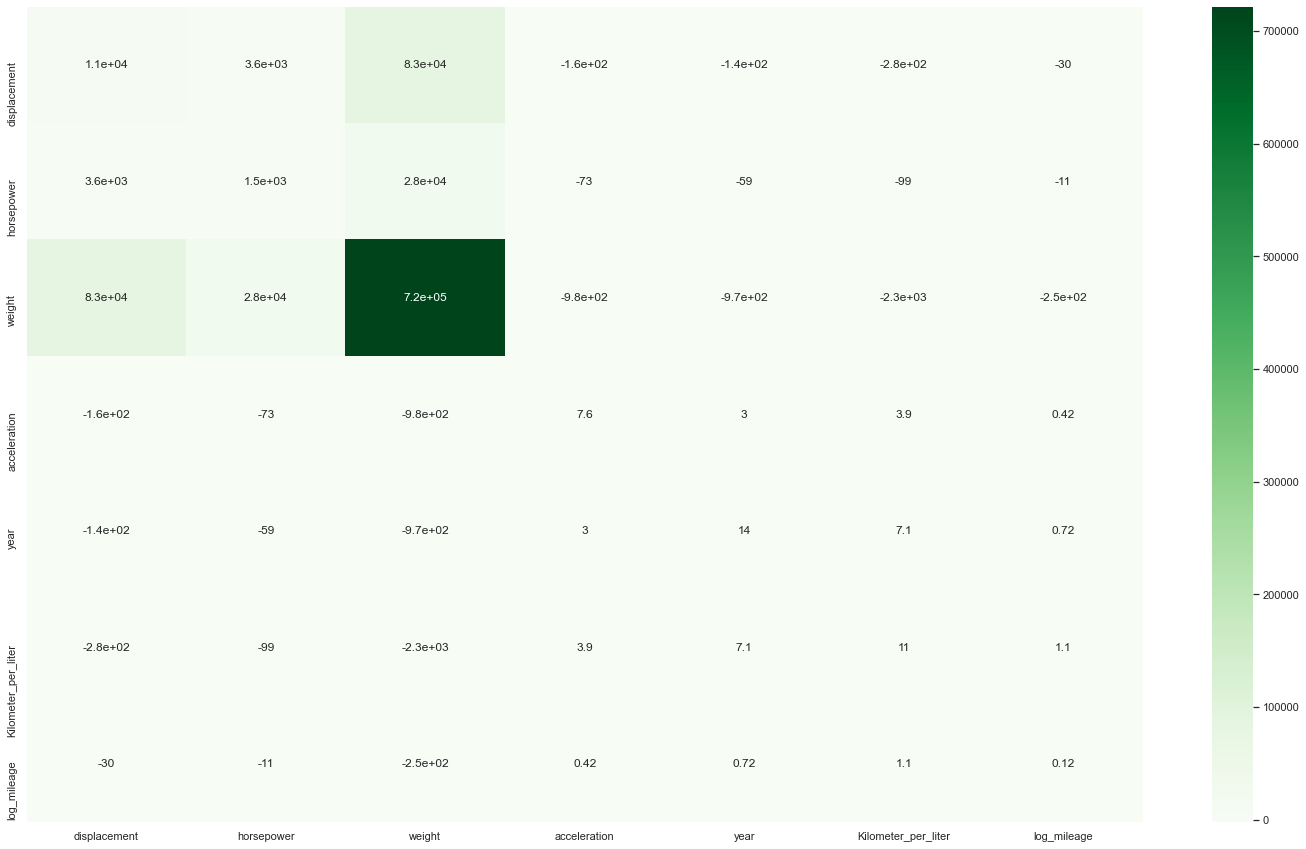

In [ ]:
plt.figure(figsize = (25,15))
sns.heatmap(data = df_data3.cov(), annot = True, cmap = 'Greens')

A positive covariance means that asset returns move together while a negative covariance means they move inversely.

## 4.4 Correlation

In [ ]:
corr = df_data3.corr()
corr

,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,log_mileage
displacement,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.805127,-0.853691
horsepower,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.778427,-0.830155
weight,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.832244,-0.875658
acceleration,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.423329,0.447574
year,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.580541,0.577275
Kilometer_per_liter,-0.805127,-0.778427,-0.832244,0.423329,0.580541,1.000000,0.983909
log_mileage,-0.853691,-0.830155,-0.875658,0.447574,0.577275,0.983909,1.000000


<AxesSubplot:>

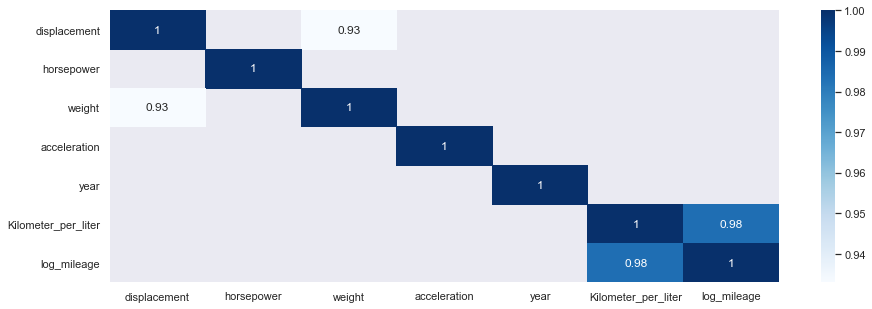

In [ ]:
    plt.figure(figsize = (15,5))
    sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)] , cmap = 'Blues', annot = True) 

# FIltering heat map which is having correlation  >= 0.9 and <= -0.9

	
By looking at the correlation matrix we can see that variables 'displacement','weight' and 'horse' have a strong positive correlation with each other. These feature pairs are strongly correlated to each other. Ideally, we should not select these features together for training the model.

In [ ]:
data_list = df_data3.drop(['weight','displacement','manufacturer', 'model'], axis =1)
data_list

,origin,cylinders,horsepower,acceleration,year,Kilometer_per_liter,log_mileage
0,1,8,130.0,12.0,1970,7.652587,2.035044
1,1,8,165.0,11.5,1970,6.377156,1.852722
2,1,8,150.0,11.0,1970,7.652587,2.035044
3,1,8,150.0,12.0,1970,6.802299,1.917261
4,1,8,140.0,10.5,1970,7.227443,1.977885
...,...,...,...,...,...,...,...
393,1,4,86.0,15.6,1982,11.478880,2.440509
394,2,4,52.0,24.6,1982,18.706323,2.928862
395,1,4,84.0,11.6,1982,13.604599,2.610408
396,1,4,79.0,18.6,1982,11.904024,2.476876


In [ ]:
data_cleaned = data_list.copy()
data_cleaned.head(20)

,origin,cylinders,horsepower,acceleration,year,Kilometer_per_liter,log_mileage
0,1,8,130.0,12.0,1970,7.652587,2.035044
1,1,8,165.0,11.5,1970,6.377156,1.852722
2,1,8,150.0,11.0,1970,7.652587,2.035044
3,1,8,150.0,12.0,1970,6.802299,1.917261
4,1,8,140.0,10.5,1970,7.227443,1.977885
5,1,8,198.0,10.0,1970,6.377156,1.852722
6,1,8,220.0,9.0,1970,5.952012,1.783729
7,1,8,215.0,8.5,1970,5.952012,1.783729
8,1,8,225.0,10.0,1970,5.952012,1.783729
9,1,8,190.0,8.5,1970,6.377156,1.852722


In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    object 
 1   cylinders            392 non-null    object 
 2   horsepower           392 non-null    float64
 3   acceleration         392 non-null    float64
 4   year                 392 non-null    int64  
 5   Kilometer_per_liter  392 non-null    float64
 6   log_mileage          392 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 32.6+ KB


## 5. Label Encoding of Categorical Data

We are doing One-Hot encoding the for Nominal categorical parameters using "get_dummies()" function. In Pandas library

In [ ]:
df_dummy = pd.get_dummies(data_cleaned, drop_first = True)

In [ ]:
df_dummy.head(20) # Checked

,horsepower,acceleration,year,Kilometer_per_liter,log_mileage,origin_2,origin_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,130.0,12.0,1970,7.652587,2.035044,0,0,0,0,0,1
1,165.0,11.5,1970,6.377156,1.852722,0,0,0,0,0,1
2,150.0,11.0,1970,7.652587,2.035044,0,0,0,0,0,1
3,150.0,12.0,1970,6.802299,1.917261,0,0,0,0,0,1
4,140.0,10.5,1970,7.227443,1.977885,0,0,0,0,0,1
5,198.0,10.0,1970,6.377156,1.852722,0,0,0,0,0,1
6,220.0,9.0,1970,5.952012,1.783729,0,0,0,0,0,1
7,215.0,8.5,1970,5.952012,1.783729,0,0,0,0,0,1
8,225.0,10.0,1970,5.952012,1.783729,0,0,0,0,0,1
9,190.0,8.5,1970,6.377156,1.852722,0,0,0,0,0,1


## 6. Standardise Data

ML algorithm works better when features are relatively on a similar scale and close to Normal Distribution.

Read Article: https://medium.com/analytics-vidhya/why-scaling-is-important-in-machine-learning-aee5781d161a

KDE Plot of the Orginal distribution

<AxesSubplot:title={'center':'Orginal DIstribution'}, xlabel='horsepower', ylabel='Density'>

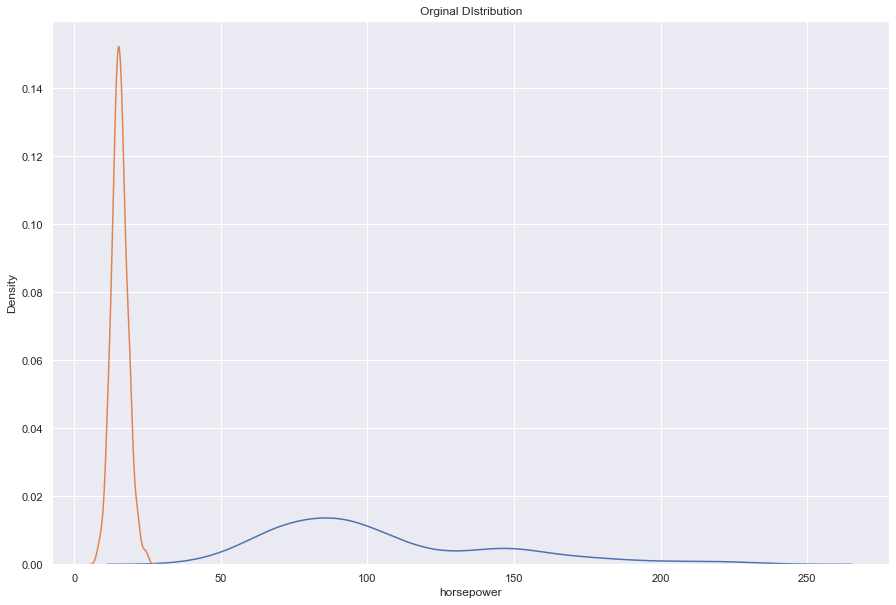

In [ ]:
fig, ax1 = plt.subplots(ncols = 1, figsize = (15,10))
ax1.set_title('Orginal DIstribution')

sns.kdeplot(df_dummy['horsepower'], ax = ax1)
sns.kdeplot(df_dummy['acceleration'], ax = ax1)

From the above diagram it is clear that columes are not in similar sacle. So we want to Standardise the data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler # importing library

In [ ]:
x = df_dummy.drop(['log_mileage','Kilometer_per_liter'], axis = 1) # Dropping target variables
x

,horsepower,acceleration,year,origin_2,origin_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,130.0,12.0,1970,0,0,0,0,0,1
1,165.0,11.5,1970,0,0,0,0,0,1
2,150.0,11.0,1970,0,0,0,0,0,1
3,150.0,12.0,1970,0,0,0,0,0,1
4,140.0,10.5,1970,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
393,86.0,15.6,1982,0,0,1,0,0,0
394,52.0,24.6,1982,1,0,1,0,0,0
395,84.0,11.6,1982,0,0,1,0,0,0
396,79.0,18.6,1982,0,0,1,0,0,0


In [ ]:
scaler = MinMaxScaler()
scaler.fit(x)
#fit() stores the min and max vlaue of a column. No transformation is doing by fit()
#Feature scaling needs to be done only in continuous data. Normalization willnot change the one-hot encoded variables.

MinMaxScaler()

If we are not giving any parameter in MinMaxScaler() then default values is 0 to 1. Since the value is btw 0 and 1 here we used Normalization for scaling the feature.

In [ ]:
X = scaler.fit_transform(x) # MinMaxScaler() will not scale the 
X # Output is a NumPY array which is called "Feature Matrix"

array([[0.45652174, 0.23809524, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.64673913, 0.20833333, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.56521739, 0.17857143, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.20652174, 0.21428571, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.17934783, 0.63095238, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19565217, 0.67857143, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
y = df_dummy.log_mileage # Target
y

0      2.035044
1      1.852722
2      2.035044
3      1.917261
4      1.977885
         ...   
393    2.440509
394    2.928862
395    2.610408
396    2.476876
397    2.578659
Name: log_mileage, Length: 392, dtype: float64

In [ ]:
y.shape

(392,)

In [ ]:
from sklearn.model_selection import train_test_split
# let us now split the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=10)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (313, 9)
X_test  (79, 9)
y_train  (313,)
y_test  (79,)


## 7. Linear Regression

**7.1 Linear Regression using Ordinary Least Square (OLS)**

**1. Build the model**

In [ ]:
from sklearn.linear_model import LinearRegression
# build the model
OLS_model = LinearRegression() # Initilizing LinearRegression class

# fit the model
a = OLS_model.fit(X_train, y_train)
a

LinearRegression()

**2. Predict the values**

In [ ]:
y_pred_OLS = OLS_model.predict(X_test)

Before we compute accuracy let's plot the predicted values

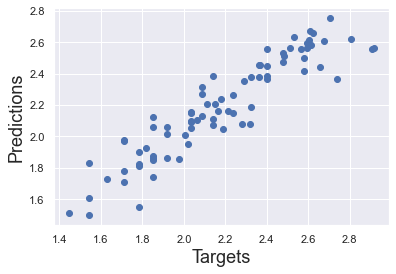

In [ ]:
plt.scatter(y_test,y_pred_OLS)
plt.xlabel('Targets' ,size = 18)
plt.ylabel('Predictions',size = 18)
plt.show()

	
Our model fit well to some extent

**3. Compute accuracy measures**

In [ ]:
# compute the R-Squared
r_squared_OLS = OLS_model.score(X_train,y_train)

# Number of observation or sample size
n = 313 # number of rows

# No of independent variables
p = 9 # number of colums

#Compute Adj-R-Squared
Adj_r_squared_OLS = 1 - (1-r_squared_OLS)*(n-1)/(n-p-1)

# Compute RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_OLS = sqrt(mean_squared_error(y_test, y_pred_OLS))

**4. Tabulate the results**

In [ ]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', ''R-squared', 'Adj R-squared', 'RMSE'

# create a list of column names
cols = ['Model', 'R-squared', 'Adj R-squared', 'RMSE']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
OLS_metrics = pd.Series({'Model': "OLS",
                 'R-squared' : r_squared_OLS, 'Adj R-squared' : Adj_r_squared_OLS , 'RMSE' :rmse_OLS})



# appending our result table
result_tabulation = result_tabulation.append(OLS_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,R-squared,Adj R-squared,RMSE
0,OLS,0.86382,0.859775,0.135834


**7.2 Linear Regression using SGD**

What is SGD (Stochastic Gradient Descent) ?

https://towardsdatascience.com/stochastic-gradient-descent-clearly-explained-53d239905d31

	
Now we build a Linear regression model using SGD Regressor. We start with our original data set gradually proceeding with our analysis

In order to build a Linear regression model using SGD Regressor, we do the following:
1. Build the model
2. Predict the values
3. Compute the accuracy measures
4. Tabulate the results

1. Build the model

In [ ]:
from sklearn.linear_model import SGDRegressor

# build the model
SGD_model = SGDRegressor(loss="squared_loss",alpha = 0.1, max_iter = 1000)

# fit the model
SGD_model.fit(X_train, y_train)

SGDRegressor(alpha=0.1)

2. Make Predictions

In [ ]:
y_pred_SGD  = SGD_model.predict(X_test)

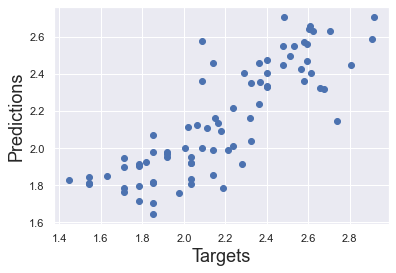

In [ ]:
# Before we compute accuracy let's plot the predicted values

plt.scatter(y_test,y_pred_SGD)
plt.xlabel('Targets' ,size = 18)
plt.ylabel('Predictions',size = 18)
plt.show()

3. Compute accuracy measures

In [ ]:
# compute the R-Squared
r_squared_SGD = SGD_model.score(X_train,y_train)

# Number of observation or sample size
n = 313 

# No of independent variables
p = 9

#Compute Adj-R-Squared
Adj_r_squared_SGD = 1 - (1-r_squared_SGD)*(n-1)/(n-p-1)

# Compute RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_SGD = sqrt(mean_squared_error(y_test, y_pred_SGD))

4. Tabulate the results

In [ ]:
# compiling the required information
SGD_metrics = pd.Series({'Model': "SGD",
                 'R-squared' : r_squared_SGD, 'Adj R-squared' : Adj_r_squared_SGD , 'RMSE' :rmse_SGD})



# appending our result table
result_tabulation = result_tabulation.append(SGD_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,R-squared,Adj R-squared,RMSE
0,OLS,0.863820,0.859775,0.135834
1,SGD,0.734538,0.726653,0.196404


# 	It can be seen from the result tabulation, that accuracy measures for the OLS is better than SGD